In [50]:
import numpy as np

rib_num=2
tRNA_num=41
tRNA_cog=1
reaction_time = 0 
elong_times = list()
ribosome_react_list = np.zeros(rib_num)
print(ribosome_react_list)
for i in range(100):
    cog_bind = False
    total_time = 0
    while not cog_bind:
        reacting_ID = np.random.randint(tRNA_num+1)
        if  reacting_ID<tRNA_num:
            total_time += np.random.exponential(1.4)
        else:
            cog_time = np.random.uniform(0,1.4)
            if cog_time<1:
                cog_bind=True
            total_time+=cog_time
    elong_times.append(total_time)
print(elong_times)
print(np.average(elong_times))
    

[0. 0.]
[0.5261020096231577, 98.05113128419588, 96.72370060544786, 23.889098876952623, 10.34114542903979, 235.06285473610595, 89.20177608535472, 51.242868495378765, 331.0897066933689, 142.0752091552863, 59.10673604436265, 211.06700502891803, 56.95094789976589, 103.70303244935933, 95.00215603094263, 12.121846045967724, 7.067654405059371, 97.06825699292033, 143.73383978930727, 176.9926789165133, 35.26941863845021, 16.731545919091495, 32.54598151917514, 57.075679033683635, 91.56272111946508, 78.15561330309427, 48.683709765358465, 15.339692194170375, 39.912182536155434, 140.0142914234562, 182.3234663278893, 16.336101017259775, 83.20220848702563, 177.70209280423782, 8.212016834208622, 6.81305619441639, 76.13675411334437, 62.612794376828134, 19.39734133358224, 122.34767674767842, 176.2651766040813, 37.11026107557664, 70.01020448187134, 23.360201040638874, 162.09813555045622, 119.52643857592159, 143.95151485801136, 65.88267983057466, 9.740823072794338, 15.95202421981524, 283.96050310342804, 1

In [405]:
np.random.exponential(1000/717,rib_num)

array([1.18939635, 0.81681418])

In [499]:
import matplotlib.pyplot as plt
%matplotlib inline
def react_sim(rib_num=1,tRNA_cog=1,repeatAllowed=True):
    import numpy as np

    #arbitrarily pick rib_id = 0 as cognate ribosome
    #arbitrarily pick tRNA ids 0 to N as cognate tRNAs
    tRNA_id=np.arange(42)
    elong_times = list()
    cog_bind=False;
    sys_t=0
    rxns=0
    
    ## Randomly pick tRNA to be bound to all ribosomes from all possible tRNA.
    tRNA_bound=np.random.choice(tRNA_id,rib_num,replace=False)
    tRNA_unbound = [tRNA for tRNA in tRNA_id if tRNA not in tRNA_bound]

    ## For each ribosome, now with a reacting tRNA, pick an exponential random time until dissociation
    react_time = np.random.exponential(1000/717,rib_num)
    
    ## Dealing with the case of cog tRNA binding to cog ribosome
    if tRNA_bound[0] in np.arange(tRNA_cog) and np.random.uniform(0,1)<1475/(1475+717):
        cog_bind=True
        sys_t+=np.random.exponential(1000/1475)
        return sys_t,rxns
        
    #### Loop while cognate tRNA isn't bound to cognate ribosome successfully
    while not cog_bind:
        ###Find next event (a tRNA unbinding from a ribosome) and jump the system to this time
        next_rib_time = min(react_time)
        next_rib = np.argmin(react_time)
        just_unbound_tRNA = tRNA_bound[next_rib]

        if(next_rib==0):
            rxns+=1
        ##Adjust all pending reaction times by change in system time
        sys_t+= next_rib_time
        react_time = react_time - np.ones(rib_num)*next_rib_time
        
        ##Pick new tRNA to be bound to recently unbound ribosome
        if repeatAllowed:
            next_tRNA = np.random.choice(np.concatenate((tRNA_unbound,[just_unbound_tRNA])))
        else:
            next_tRNA = np.random.choice(tRNA_unbound)

        tRNA_bound[next_rib] = next_tRNA
        tRNA_unbound = [tRNA for tRNA in tRNA_id if tRNA not in tRNA_bound]
        
            
        ##Pick a reaction time for the newly bound tRNA
        react_time[next_rib] = np.random.exponential(1000/717)


        ##If tRNA that's newly bound is a cog tRNA and its bound at the cognate ribosome, see if the cog_binding is successful
        if tRNA_bound[0] in np.arange(tRNA_cog) and next_rib==0:
            if np.random.uniform(0,1)<1475/(1475+717):
                sys_t+=np.random.exponential(1000/1475)
                return sys_t,rxns
                
    return sys_t,rxns

In [481]:
sim_times=list()
rxn_count = list()
for i in range(100000):
    rxn = react_sim(rib_num=1,tRNA_cog=42)
    sim_times.append(rxn[0])
    rxn_count.append(rxn[1])
print(np.average(sim_times))
print(np.average(rxn_count))
#Sanity check with 1 ribosome and 42 tRNA cog:
#sim_time = 1.358 = 0.673*(0.678)+0.327(1.4)+0.327(0.673*(0.678)+0.327(1.4))+0.327^2(0.673*(0.678)+0.327(1.4))+0.327^3(0.673*(0.678)+0.327(1.4))+0.327^4(0.673*(0.678)+0.327(1.4))+0.327^5(0.673*(0.678)+0.327(1.4))+0.327^6(0.673*(0.678)+0.327(1.4))=
#reactions: 0.47=0.32+0.32^2+0.32^3+0.32^4+0.32^5+0.32^6+0.32^7+0.32^8+0.32^9

0.24789485718637552
opportunity
success
0.17288832956829922
opportunity
success
0.41189367200272353
opportunity
nope
2.989439563527582
opportunity
success
3.0271481466203305
opportunity
success
0.962725299486917
opportunity
nope
1.5252233576781389
opportunity
success
0.15970394794035975
opportunity
nope
1.2328695744735183
opportunity
success
1.303378736843702
opportunity
success
1.6631796572621065
opportunity
success
0.07145897996888172
opportunity
success
1.8265418509022875
opportunity
nope
1.8337611737116026
opportunity
success
0.4698650523458964
opportunity
success
1.5417085883709216
opportunity
nope
3.0173500041830654
opportunity
success
0.16796647509888554
opportunity
success
0.5347128321234927
opportunity
success
0.3805341202990195
opportunity
nope
1.4763776494729988
opportunity
success
0.635667651793932
opportunity
nope
0.7557156143265668
opportunity
nope
1.3071288182033558
opportunity
nope
1.579909309762453
opportunity
nope
2.0976141088067726
opportunity
success
0.0876626248087

KeyboardInterrupt: 

In [493]:
sim_times=list()
rxn_count = list()
for i in range(100):
    rxn = react_sim(rib_num=40,tRNA_cog=1)
    sim_times.append(rxn[0])
    rxn_count.append(rxn[1])
print(np.average(sim_times))
print(np.average(rxn_count))
#Sanity check with 1 ribosome and 42 tRNA cog:
#sim_time = 1.358 = 0.673*(0.678)+0.327(1.4)+0.327(0.673*(0.678)+0.327(1.4))+0.327^2(0.673*(0.678)+0.327(1.4))+0.327^3(0.673*(0.678)+0.327(1.4))+0.327^4(0.673*(0.678)+0.327(1.4))+0.327^5(0.673*(0.678)+0.327(1.4))+0.327^6(0.673*(0.678)+0.327(1.4))=
#reactions: 0.47=0.32+0.32^2+0.32^3+0.32^4+0.32^5+0.32^6+0.32^7+0.32^8+0.32^9

111.34856588476582
78.84


In [ ]:
##gr3
weight = np.array([1.83017716e-01, 2.26910857e-01, 2.06006407e-01, 1.62235994e-01,
 1.09319563e-01, 6.31589405e-02, 3.06503745e-02, 1.22125469e-02,
 4.60216889e-03, 1.35708695e-03, 4.08879048e-04, 9.43163479e-05,
 2.51491044e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00])

sim_time_all = list()

for num_rib in [4,8,9,9,8,7]:
    sim_time_gr = list()
    rxn_count_gr = list()
    for num_tRNA in np.arange(1,7):
        sim_times=list()
        rxn_count = list()
        for i in range(5000):
            rxn = react_sim(rib_num=num_rib,tRNA_cog=num_tRNA)
            sim_times.append(rxn[0])
            rxn_count.append(rxn[1])
        sim_time_gr.append(np.average(sim_times))
        rxn_count_gr.append(np.average(rxn_count))
    print(sim_time_gr)
    print(sim_time_gr*weight[1:len(sim_time_gr)+1]/(1-weight[0]))
    print(np.sum(sim_time_gr*weight[1:len(sim_time_gr)+1]/(1-weight[0])))
    sim_time_all.append(np.sum(sim_time_gr*weight[1:len(sim_time_gr)+1]/(1-weight[0])))
print(sim_time_all)
#Need to scale each by proper weight now
#Note, double tRNA gives actually double the speed this time, since no effects of space.

[86.44949091660054, 43.57604500494757, 28.86288850623283, 21.175382666068412, 16.869170497517622, 13.634277727953627]
[24.01071413 10.98793039  5.73158011  2.83345628  1.3041151   0.51151136]
45.37930736072996
[86.20558049952702, 43.46311830956427, 28.491073684172367, 20.92842046904161, 17.174528572897316, 13.99035624091028]
[23.9429698  10.95945532  5.65774528  2.80041052  1.3277216   0.5248702 ]
45.213172719125595
[85.36399454990541, 43.34539472324622, 28.100334705554108, 21.26443850281793, 16.733636206103295, 14.063099236159653]
[23.70922545 10.9297707   5.5801525   2.84537275  1.29363727  0.52759927]
44.88575793420835
[86.33675125423076, 43.42591146298888, 28.36616263892338, 21.666819950513442, 17.23018803685221, 13.738192849448609]
[23.97940151 10.95007342  5.6329405   2.899215    1.3320245   0.5154099 ]
45.30906482419779


In [501]:
##gr3
weight = np.array([1.83017716e-01, 2.26910857e-01, 2.06006407e-01, 1.62235994e-01,
 1.09319563e-01, 6.31589405e-02, 3.06503745e-02, 1.22125469e-02,
 4.60216889e-03, 1.35708695e-03, 4.08879048e-04, 9.43163479e-05,
 2.51491044e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00])

sim_time_all = list()

for num_rib in [4,8,9,9,8,7]:
    sim_time_gr = list()
    rxn_count_gr = list()
    for num_tRNA in np.arange(1,7):
        sim_times=list()
        rxn_count = list()
        for i in range(1000):
            rxn = react_sim(rib_num=num_rib,tRNA_cog=num_tRNA,repeatAllowed=False)
            sim_times.append(rxn[0])
            rxn_count.append(rxn[1])
        sim_time_gr.append(np.average(sim_times))
        rxn_count_gr.append(np.average(rxn_count))
    print(sim_time_gr)
    print(sim_time_gr*weight[1:len(sim_time_gr)+1]/(1-weight[0]))
    print(np.sum(sim_time_gr*weight[1:len(sim_time_gr)+1]/(1-weight[0])))
    sim_time_all.append(np.sum(sim_time_gr*weight[1:len(sim_time_gr)+1]/(1-weight[0])))
print(sim_time_all)
#Need to scale each by proper weight now
#Note, double tRNA gives actually double the speed this time, since no effects of space.

[92.35518269772317, 41.390233336107414, 28.150403612577094, 20.581840480375742, 17.149621116463116, 13.419645593132696]
[25.65097685 10.4367664   5.59009516  2.754035    1.32579607  0.5034591 ]
46.26112858306741
[80.94077846247261, 42.16675376216474, 28.152951064409752, 19.924650793436133, 16.995575257990936, 12.929675757324512]
[22.48070952 10.63257014  5.59060103  2.66609712  1.31388715  0.48507711]
43.1689420731751
[82.59193033516732, 41.96009935133395, 27.639313987327043, 20.58217519375318, 16.468059010162563, 13.814715511341516]
[22.93930488 10.58046114  5.4886032   2.75407979  1.27310614  0.51828077]
43.553835908586265
[79.28360936989749, 42.93647935203637, 27.81343752716058, 20.238417812334532, 17.15925799773785, 14.208989782034886]
[22.02044292 10.82666052  5.52318058  2.70808197  1.32654107  0.53307259]
42.93797963988692
[87.95966429590379, 42.492298447108716, 26.539314080722498, 21.466334690541043, 17.729182989593312, 14.080964767449766]
[24.43015375 10.71465795  5.27016569  

In [306]:
22.548773651683703*1.62235994e-01

3.658222706861915

In [ ]:
count=0
tot_count=0
for i in range(50000):
    ## Randomly pick tRNA to be bound to all ribosomes from all possible tRNA.
    tRNA_bound=np.random.choice(tRNA_id,rib_num,replace=False)
    tRNA_unbound = [tRNA for tRNA in tRNA_id if tRNA not in tRNA_bound]
    ## For each ribosome, now with a reacting tRNA, pick an exponential random time until dissociation

    react_time = np.ones(rib_num)*np.random.exponential(1.4)
    ## Dealing with the case of cog tRNA binding to cog ribosome
    if 0 in tRNA_bound[0:tRNA_cog]:
        cog_time_f = np.random.uniform(0,0.68)
        cog_time_b = np.random.uniform(0,1.4)
        tot_count+=1
        if np.random.uniform(0,1)<1475/(1475+717):
            cog_bind=True
            react_time[0] = cog_time_f
            count+=1
        else:
            react_time[0] = cog_time_b 
        total_time+=cog_time
print(count, ' ', tot_count, ' ',count/tot_count)

In [ ]:
##gr3
weight = np.array([1.83017716e-01, 2.26910857e-01, 2.06006407e-01, 1.62235994e-01,
 1.09319563e-01, 6.31589405e-02, 3.06503745e-02, 1.22125469e-02,
 4.60216889e-03, 1.35708695e-03, 4.08879048e-04, 9.43163479e-05,
 2.51491044e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00])

sim_time_all = list()

for num_rib in [4,8,9,9,8,7]:
    sim_time_gr = list()
    rxn_count_gr = list()
    for num_tRNA in np.arange(1,7):
        sim_times=list()
        rxn_count = list()
        for i in range(2):
            print(num_rib)
            rxn = react_sim(rib_num=num_rib,tRNA_cog=num_tRNA)
            sim_times.append(rxn[0])
            rxn_count.append(rxn[1])
        sim_time_gr.append(np.average(sim_times))
        rxn_count_gr.append(np.average(rxn_count))
    print(sim_time_gr)
    print(sim_time_gr*weight[1:len(sim_time_gr)+1]/(1-weight[0]))
    print(np.sum(sim_time_gr*weight[1:len(sim_time_gr)+1]/(1-weight[0])))
    sim_time_all.append(np.sum(sim_time_gr*weight[1:len(sim_time_gr)+1]/(1-weight[0])))
print(sim_time_all)
#Need to scale each by proper weight now
#Note, double tRNA gives actually double the speed this time, since no effects of space.

Text(0.5, 1.0, 'Simulations with instant self-mixing')

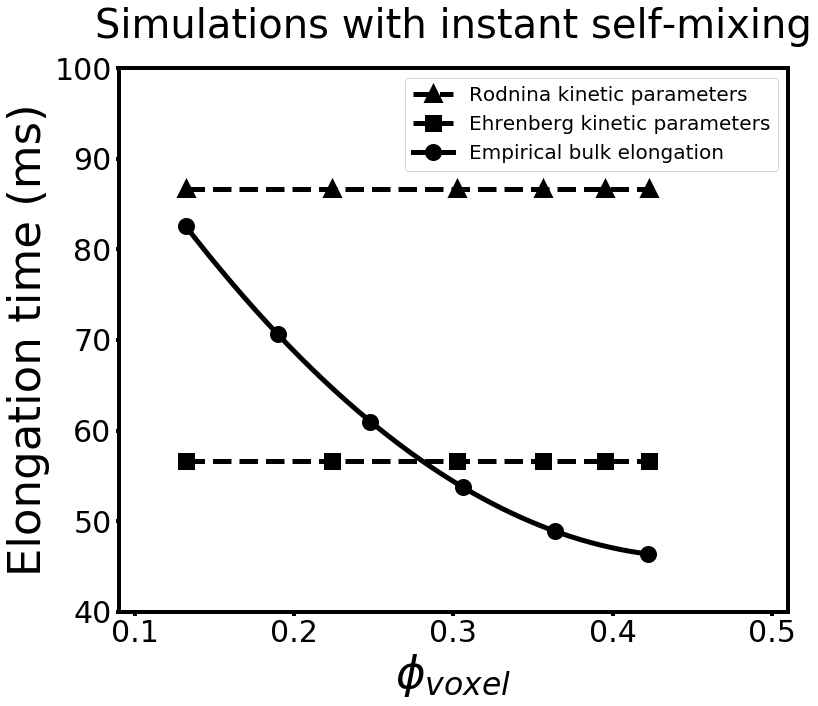

In [502]:
fig, ax = plt.subplots(1,1,figsize=(12,10))
x=[0.132,0.224,0.302,0.356,0.395,0.423]
y_model,SS_err,_,_,_ = np.polyfit(x,[1000/12,1000/16,1000/18,1000/20,1000/21,1000/22],2,full=True)
y_hat = np.polyval(y_model,x)
x_sweep_i = np.linspace(min(x),max(x),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x,np.array([45,45,45,45,45,45]+np.array([1000/1529+1000/209+1000/200+1000/32])),marker='^',markersize=12,markeredgewidth=5,linewidth=5,color='black',linestyle='dashed',label='Rodnina kinetic parameters')
ax.plot(x,np.array([45/3,45/3,45/3,45/3,45/3,45/3]+np.array([1000/1529+1000/209+1000/200+1000/32])),marker='s',markersize=12,markeredgewidth=5,linewidth=5,color='black',linestyle='dashed',label='Ehrenberg kinetic parameters')
ax.plot(x_sweep_i,y_hat_sweep_i,marker='o',markersize=12,markeredgewidth=5,markevery=199,linewidth=5,color='black',label='Empirical bulk elongation')

ax.tick_params(axis='both', which='major',width=4, labelsize=30)
ax.set_xlim(0.09,0.51)
ax.set_ylim(40,100)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)
ax.set_xlabel('$\phi_{voxel}$',size=45,color='black')
ax.set_ylabel('Elongation time (ms)',size=45,color='black')
ax.legend()
ax.legend( prop={'size': 20})
plt.title('Simulations with instant self-mixing',size=40,pad=30)

#Super-physical simulations

Text(0.5, 1.0, 'Simulations with instant self-mixing &\n ~3x cognate tRNA bias')

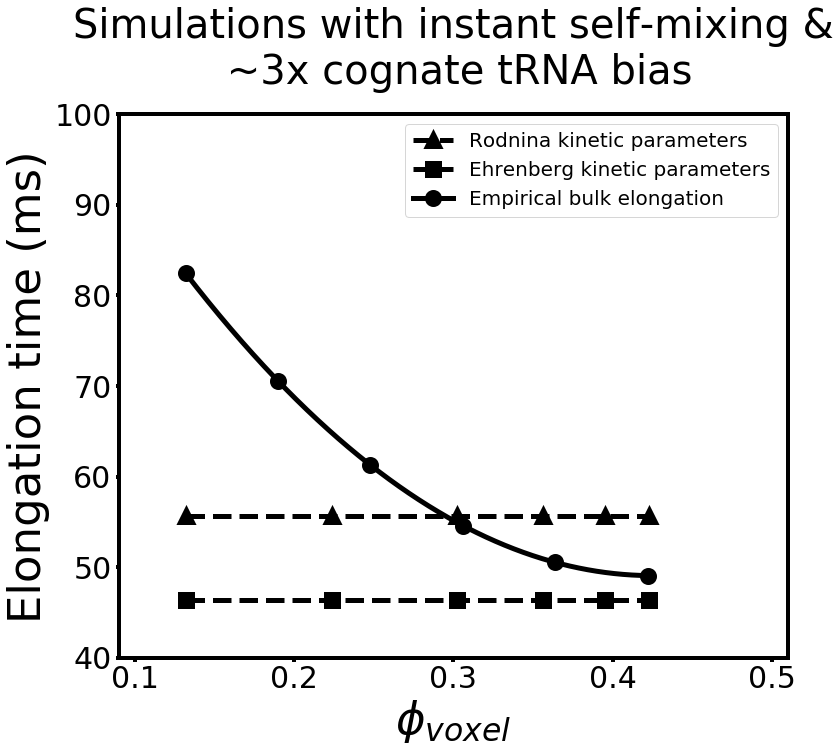

In [515]:
fig, ax = plt.subplots(1,1,figsize=(12,10))
x=[0.132,0.224,0.302,0.356,0.395,0.423]
y_model,SS_err,_,_,_ = np.polyfit(x,[1000/12,1000/16,1000/18,1000/19,1000/20,1000/21],2,full=True)
y_hat = np.polyval(y_model,x)
x_sweep_i = np.linspace(min(x),max(x),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x,np.array([14,14,14,14,14,14]+np.array([1000/1529+1000/209+1000/200+1000/32])),marker='^',markersize=12,markeredgewidth=5,linewidth=5,color='black',linestyle='dashed',label='Rodnina kinetic parameters')
ax.plot(x,np.array([14/3,14/3,14/3,14/3,14/3,14/3]+np.array([1000/1529+1000/209+1000/200+1000/32])),marker='s',markersize=12,markeredgewidth=5,linewidth=5,color='black',linestyle='dashed',label='Ehrenberg kinetic parameters')
ax.plot(x_sweep_i,y_hat_sweep_i,marker='o',markersize=12,markeredgewidth=5,markevery=199,linewidth=5,color='black',label='Empirical bulk elongation')

ax.tick_params(axis='both', which='major',width=4, labelsize=30)
ax.set_xlim(0.09,0.51)
ax.set_ylim(40,100)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)
ax.set_xlabel('$\phi_{voxel}$',size=45,color='black')
ax.set_ylabel('Elongation time (ms)',size=45,color='black')
ax.legend()
ax.legend( prop={'size': 20})
plt.title('Simulations with instant self-mixing &\n ~3x cognate tRNA bias',size=40,pad=30)

#Super-physical simulations

#show with 6 tRNA, 5 tRNA, 4 tRNA; calculate how much bias this is

In [ ]:
14,17,21,28